In [1]:
import seaborn as sns

# import hdf5plugin, h5py
import torch, tables
from torch import nn
import os
import torch.nn.functional as F
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader, random_split, Dataset
from torchvision import transforms
from functools import partial
from tqdm.auto import tqdm
from typing import Any
import torchvision
import matplotlib.pyplot as plt
import pytorch_lightning as pl
import numpy as np
from dataclasses import dataclass
from typing import Callable
import cv2, functools, glia
import pytorch_lightning as pl
from pytorch_lightning.loggers.neptune import NeptuneLogger
import neptune
import neptunecontrib.monitoring.optuna as optuna_utils
from optuna.integration.pytorch_lightning import PyTorchLightningPruningCallback
import optuna
from datetime import datetime
import socket, plotly
from pathlib import Path
import torch.nn, gc, psycopg2
import sys, traceback
from glia.reconstructions.lib import resize_3d, gray_3d, ImageData, RetinaData, \
     ConcatDataset, ImageRetina
from sqlalchemy import create_engine
import pandas as pd

# sys.argv = [None, "/mnt/fs1/tbenst/200623_faces/R1_E3_AMES_200min_200f_14l_rgb.h5",
#             "/mnt/fs1/tbenst/models/3brain/", "9"]

sys.argv = [None, "/data/uw/200623_faces/R1_E3_AMES_200min_200f_14l_rgb.h5",
           "/data/uw/models/", "0"]

filepath = sys.argv[1]
# model_base_dir = "/storage/models/retina-reconstruction"
model_base_dir = sys.argv[2]
gpus = [ int(sys.argv[3]) ]

# open file
hdf5 = tables.open_file(filepath,'r')
h5 = hdf5.root

# crop image
imgs = h5["images"][0:100]
avg_img = np.mean(imgs, axis=(0,3))
y,x = np.where(avg_img>5)
xleft = min(x)
xright = max(x)
ytop = min(y)
ybot = max(y)

/home/tyler/.conda/envs/torch/lib/python3.8/site-packages/pkg_resources/__init__.py:1149: DeprecationWarning: Use of .. or absolute path in a resource path is not allowed and will raise exceptions in a future release.
  return get_provider(package_or_requirement).get_resource_stream(


In [2]:
image_dset = ImageData(h5["images"], crop=[ytop,ybot,xleft,xright])
# retina_dset = RetinaOnOffData(h5["data"], no_units=False, on_or_off=False)
retina_dset = RetinaData(h5["data"], nbins=10)
(image_dset[0].shape, retina_dset[0].shape)

(torch.Size([1, 64, 64]), torch.Size([10, 6, 64, 64]))

In [3]:
from glia.reconstructions.models.john_conv import ConvNet

In [7]:
modelpath = "/data/uw/models/2020-09-16T21:23:09.702675-optuna/trial_172/john-conv_epoch=296_val_mse_loss=36.02.ckpt"

In [ ]:
model = ConvNet.load_from_checkpoint(modelpath)
model.eval();

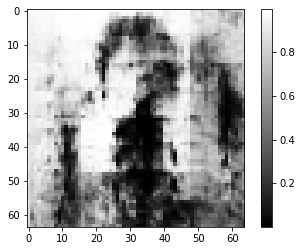

In [19]:
with torch.no_grad():
    plt.imshow(model(retina_dset[10][None])[0].numpy(), cmap="gray")
    plt.colorbar()